In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [18]:
#For FN angle averaged PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [48]:
#Multiply weight matrix to each angle data

final_out = []
for a in range(8):
    out = Wa @ data_cat_sm[a]
    final_out.append(out)

final_out = np.array(final_out)

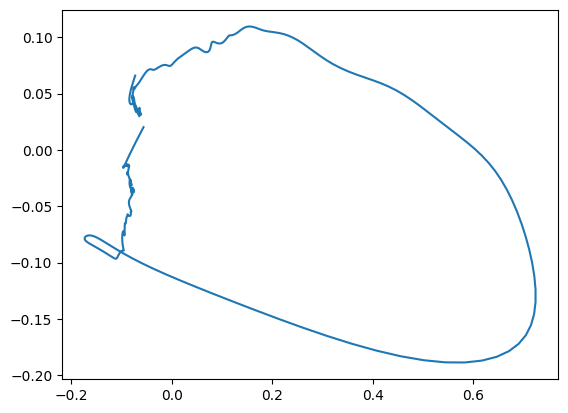

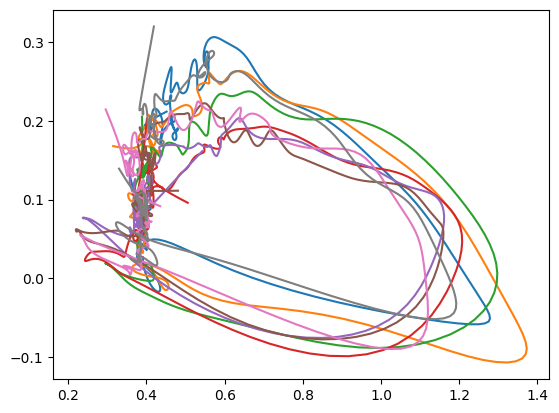

In [90]:
# Plotting

plt.figure()
plt.plot(PCA_total['p'].T[0], PCA_total['p'].T[1])

plt.figure()
for a in range(8):
    plt.plot(final_out[a][0], final_out[a][1])

In [64]:
pca_p = PCA_total['p'].T

In [94]:
# Fitting

pca_p = PCA_total['p'].T[:4]
time = np.linspace(-300, 300, 600)

r_s_total = []
for a in range(8):
    resid = np.linalg.norm(pca_p - final_out[a], axis=1)**2
    r_s = 1 - resid / (final_out[a].size * final_out[a].var())
    r_s_total.append(r_s)

r_s_total = np.array(r_s_total)

In [96]:
time

array([-300.        , -298.99833055, -297.9966611 , -296.99499165,
       -295.9933222 , -294.99165275, -293.98998331, -292.98831386,
       -291.98664441, -290.98497496, -289.98330551, -288.98163606,
       -287.97996661, -286.97829716, -285.97662771, -284.97495826,
       -283.97328881, -282.97161937, -281.96994992, -280.96828047,
       -279.96661102, -278.96494157, -277.96327212, -276.96160267,
       -275.95993322, -274.95826377, -273.95659432, -272.95492487,
       -271.95325543, -270.95158598, -269.94991653, -268.94824708,
       -267.94657763, -266.94490818, -265.94323873, -264.94156928,
       -263.93989983, -262.93823038, -261.93656093, -260.93489149,
       -259.93322204, -258.93155259, -257.92988314, -256.92821369,
       -255.92654424, -254.92487479, -253.92320534, -252.92153589,
       -251.91986644, -250.91819699, -249.91652755, -248.9148581 ,
       -247.91318865, -246.9115192 , -245.90984975, -244.9081803 ,
       -243.90651085, -242.9048414 , -241.90317195, -240.90150

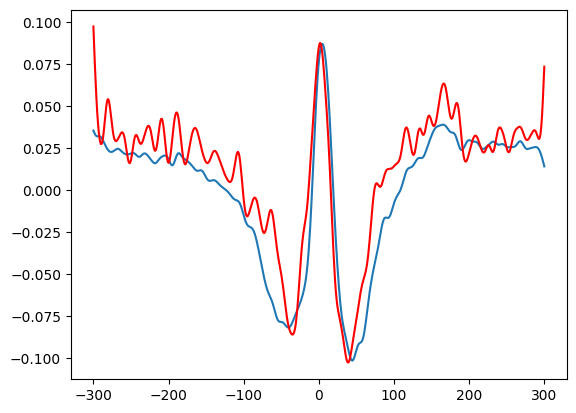

In [101]:
plt.plot(time, pca_p[3], time, final_out[0][3], 'r')

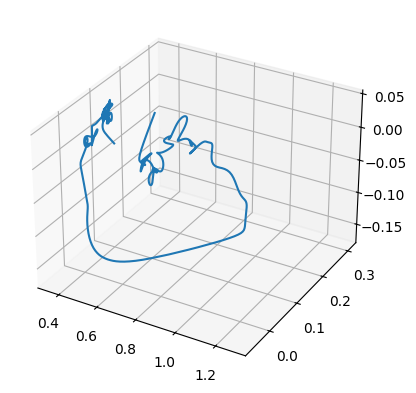

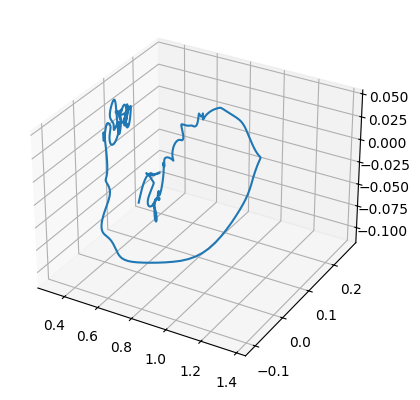

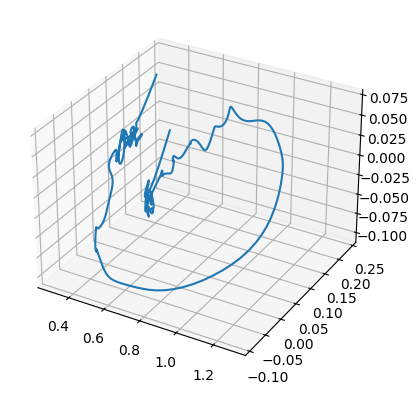

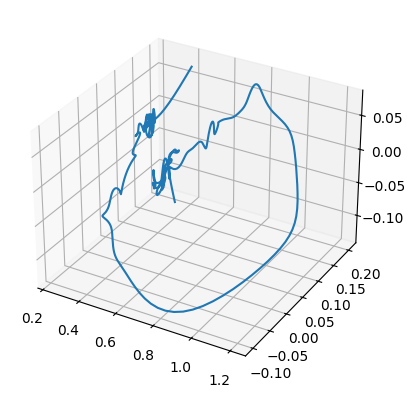

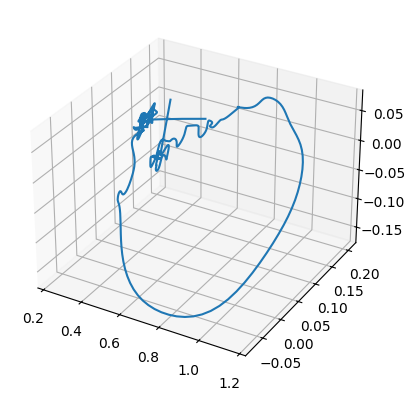

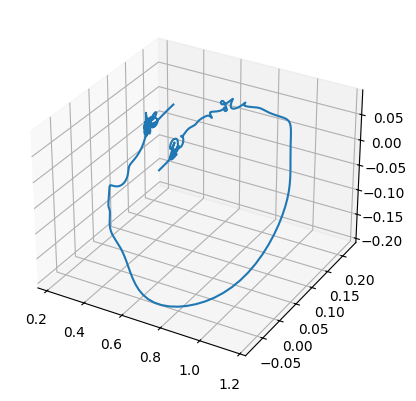

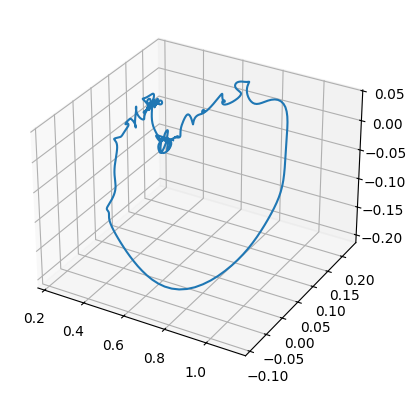

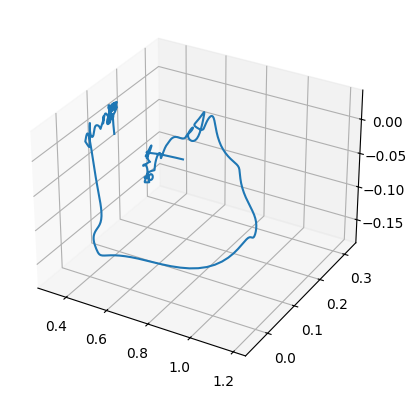

In [50]:
a=24
t = np.arange(-250,250)
plt.plot(t, pFN[a], t, pMPC @ betas[a], 'r')
resid = np.linalg.norm(pMPC @ betas[a] - pFN[a])**2
r_s = 1 - resid / (pFN[a].size * pFN[a].var())
plt.title(f'a={a}, R^2={r_s}')

In [ ]:
Wa 